<a href="https://colab.research.google.com/github/SiEggo/scraping/blob/main/basic_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libary

In [66]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import seaborn as sns

Memanggil data halaman web

In [67]:
url = "https://quotes.toscrape.com/page/1/"
page = requests.get(url)

soup = BeautifulSoup(page.content,'html.parser')
quote = soup.find_all('div',class_= 'quote')

Simpan hasil scraping dalam list of dicts

In [68]:
data = []

for q in quote:
    text = q.find('span', class_='text').get_text()
    author = q.find('small', class_='author').get_text()
    # Ambil semua tag (bisa lebih dari satu)
    tag_elements = q.find_all('a', class_='tag')
    tags = [tag.get_text() for tag in tag_elements]

    data.append({
        'Text': text,
        'Author': author,
        'Tags': ', '.join(tags)
    })

In [69]:
data

[{'Text': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
  'Author': 'Albert Einstein',
  'Tags': 'change, deep-thoughts, thinking, world'},
 {'Text': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
  'Author': 'J.K. Rowling',
  'Tags': 'abilities, choices'},
 {'Text': '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
  'Author': 'Albert Einstein',
  'Tags': 'inspirational, life, live, miracle, miracles'},
 {'Text': '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
  'Author': 'Jane Austen',
  'Tags': 'aliteracy, books, classic, humor'},
 {'Text': "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
  'Author': 'Marilyn Monroe',
  'Tags': 'be-yourself, inspirational'},
 {'T

Memasukkan data ke dataframe

In [70]:
df = pd.DataFrame(data)
df

,Text,Author,Tags
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational"
5,“Try not to become a man of success. Rather be...,Albert Einstein,"adulthood, success, value"
6,“It is better to be hated for what you are tha...,André Gide,"life, love"
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison,"edison, failure, inspirational, paraphrased"
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt,misattributed-eleanor-roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin,"humor, obvious, simile"


Analisis visual sederhana

Text(0.5, 1.0, 'Jumlah Kutipan Author Terbanyak')

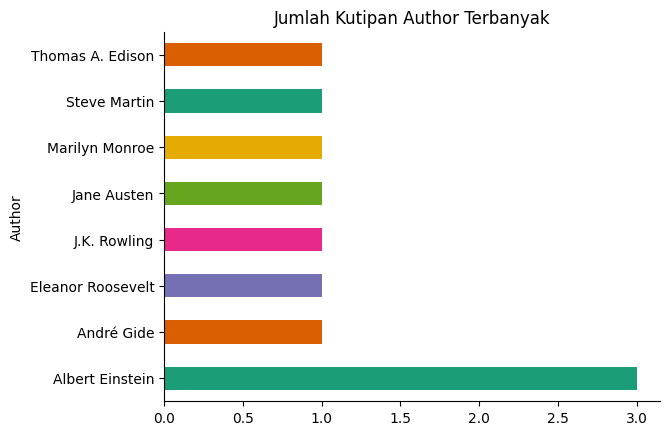

In [80]:
df.groupby('Author').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Jumlah Kutipan Author Terbanyak')

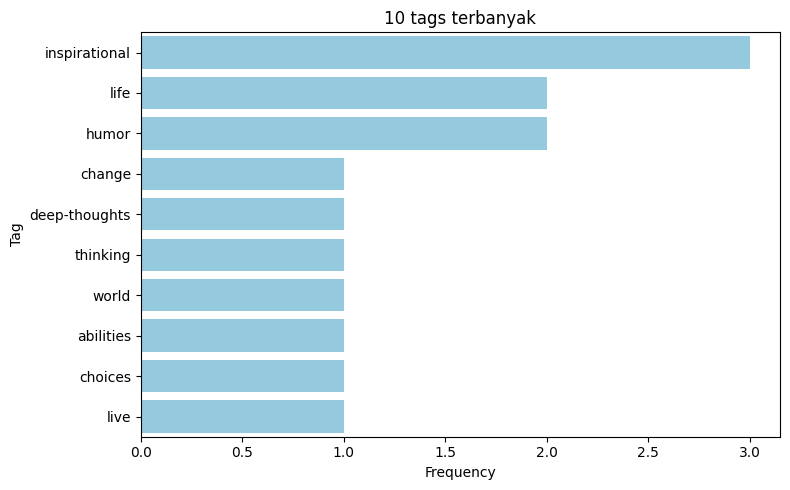

In [87]:
from collections import Counter

# Gabungkan semua tag
all_tags = ','.join(df['Tags']).split(',')
tag_counts = Counter([tag.strip() for tag in all_tags if tag.strip() != ''])

common_tags = tag_counts.most_common(10)
tags_df = pd.DataFrame(common_tags, columns=['Tag', 'Count'])

plt.figure(figsize=(8,5))
sns.barplot(x='Count', y='Tag', data=tags_df, color='skyblue')
plt.title('10 tags terbanyak')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.tight_layout()
plt.show()


Cleansing data

In [72]:
df['WordCount'] = df['Text'].apply(lambda x: len(x.split()))
df['TagCount'] = df['Tags'].apply(lambda x: len(x.split(', ')))
df

,Text,Author,Tags,WordCount,TagCount
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world",21,4
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices",16,2
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles",26,5
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor",19,4
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational",16,2
5,“Try not to become a man of success. Rather be...,Albert Einstein,"adulthood, success, value",14,3
6,“It is better to be hated for what you are tha...,André Gide,"life, love",19,2
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison,"edison, failure, inspirational, paraphrased",12,4
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt,misattributed-eleanor-roosevelt,19,1
9,"“A day without sunshine is like, you know, nig...",Steve Martin,"humor, obvious, simile",9,3


In [73]:
df['Author'] = df['Author'].str.title()
df['Text'] = df['Text'].str.strip('“”"')
df

,Text,Author,Tags,WordCount,TagCount
0,The world as we have created it is a process o...,Albert Einstein,"change, deep-thoughts, thinking, world",21,4
1,"It is our choices, Harry, that show what we tr...",J.K. Rowling,"abilities, choices",16,2
2,There are only two ways to live your life. One...,Albert Einstein,"inspirational, life, live, miracle, miracles",26,5
3,"The person, be it gentleman or lady, who has n...",Jane Austen,"aliteracy, books, classic, humor",19,4
4,"Imperfection is beauty, madness is genius and ...",Marilyn Monroe,"be-yourself, inspirational",16,2
5,Try not to become a man of success. Rather bec...,Albert Einstein,"adulthood, success, value",14,3
6,It is better to be hated for what you are than...,André Gide,"life, love",19,2
7,"I have not failed. I've just found 10,000 ways...",Thomas A. Edison,"edison, failure, inspirational, paraphrased",12,4
8,A woman is like a tea bag; you never know how ...,Eleanor Roosevelt,misattributed-eleanor-roosevelt,19,1
9,"A day without sunshine is like, you know, night.",Steve Martin,"humor, obvious, simile",9,3


In [76]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       10 non-null     object
 1   Author     10 non-null     object
 2   Tags       10 non-null     object
 3   WordCount  10 non-null     int64 
 4   TagCount   10 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes
None
       WordCount   TagCount
count  10.000000  10.000000
mean   17.100000   3.000000
std     4.817791   1.247219
min     9.000000   1.000000
25%    14.500000   2.000000
50%    17.500000   3.000000
75%    19.000000   4.000000
max    26.000000   5.000000


Export data ke ecxel

In [74]:
df.to_excel("result_scraping.xlsx",index=False)